# Bender's Decomposition Testing

In [1]:
# Add the parent directory to the path
import sys, os
sys.path.insert(0, os.path.abspath("../.."))

# Import numpy and ShortestPathGrid class
import numpy as np
from src.models.ShortestPathGrid import ShortestPathGrid

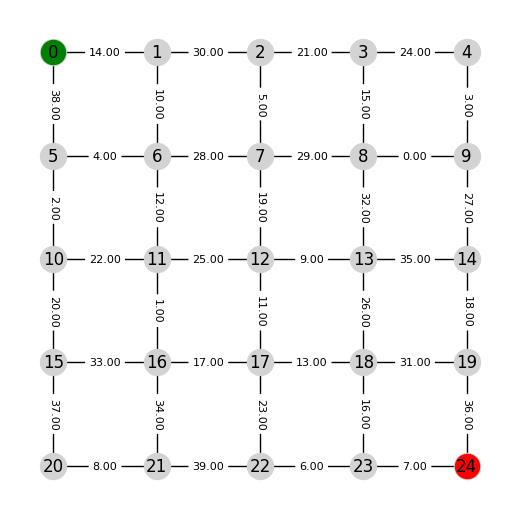

In [2]:
# Generate data
m, n = (5,5)  # grid size
np.random.seed(47)  # for reproducibility
# Create a random cost array for the grid
cost = np.arange((m-1)*n + m*(n-1))
np.random.shuffle(cost)
# Initialize the ShortestPathGrid with the cost array
grid = ShortestPathGrid(m, n, cost=cost)
# Visualize the grid
grid.visualize()

Restricted license - for non-production use only - expires 2026-11-23


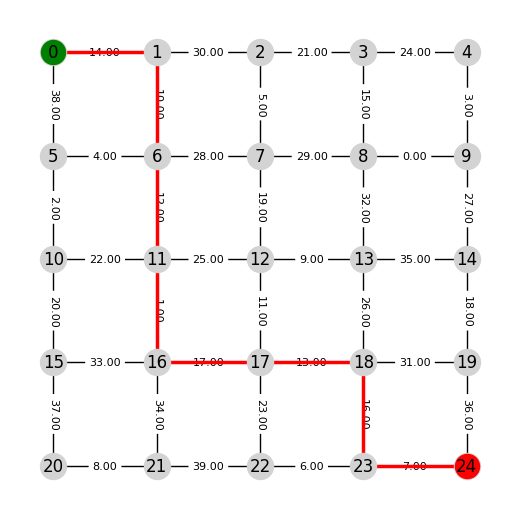

In [3]:
from src.models.ShortestPathGrb import shortestPathGrb

opt_model = shortestPathGrb(grid)
sol, obj = opt_model.solve(versatile=True)
# grid.visualize(colored_edges=sol)

In [4]:
# Define the interdiction cost
interdiction_cost = np.random.rand(grid.num_cost)*20

# Define Budget
k = 5

# Print the interdiction cost
interdiction_cost

array([10.26542751, 15.18588076,  2.57817798, 10.95922216, 17.55938135,
        9.63038671, 18.19307902, 18.10996626,  0.57110578,  9.04924749,
        6.93688909, 16.5227282 , 16.86300199,  7.01935116, 18.55680948,
        6.19468041, 10.63910969,  5.86400721,  3.72212711, 15.09071668,
        4.56264438,  3.03769445,  2.15503491,  1.57506883,  8.67233815,
        6.94265701,  7.37277814, 15.92484136, 19.9414997 , 19.78834966,
       16.54913069,  6.05676436, 19.64106968, 14.82234598, 14.98743811,
       13.79098053,  5.52921841,  3.98727345, 18.08103218, 18.33899395])

In [26]:
from src.solvers.BendersDecomposition import BendersDecomposition

# Initialize the BendersDecomposition with the opt_model
benders = BendersDecomposition(opt_model, k, interdiction_cost, max_cnt=20, eps=1e-3)

In [27]:
interdictions_x, shortest_path_y, z_min = benders.solve()

Bender's decomposition running:
-------------------------------
Iteration 1: z_max = 181.61309089354765, z_min = 90.0
Iteration 2: z_max = 158.33427081590915, z_min = 133.33899307250977
Iteration 3: z_max = 157.10273063739456, z_min = 136.60441970825195
Iteration 4: z_max = 156.94958059111104, z_min = 143.60441970825195
Iteration 5: z_max = 154.68545363395305, z_min = 152.42002487182617
Iteration 6: z_max = 154.2804936496469, z_min = 147.60441970825195
Iteration 7: z_max = 153.53335926495348, z_min = 146.60441970825195
Iteration 8: z_max = 152.420026125481, z_min = 151.59185791015625
Iteration 9: z_max = 152.420026125481, z_min = 152.42002487182617
-------------------------------
Found epsilon-optimal solution after 9 iterations with epsilon = 0.00


Original shortest path cost: 	90.00
New shortest path cost: 	152.42


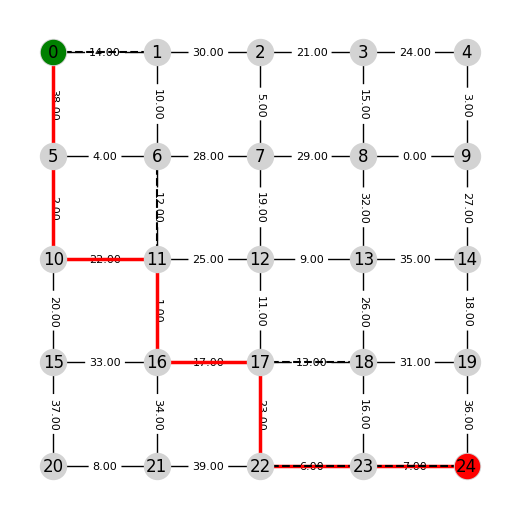

In [28]:
print(f"Original shortest path cost: \t{obj:.2f}\nNew shortest path cost: \t{z_min:.2f}")

grid.visualize(colored_edges=shortest_path_y, dashed_edges=interdictions_x)